## What does the most "normal" rescue dog look like?

During the beginning of COVID-19, many locked-down milennials and gen-z-ers found their homes getting 4 feet (erm, paws) bigger. While the homes welcomed all shapes and sizes of new furry friends, what does the most normal rescue dog look like?

We'll start by importing a scraped list of dogs on the popular [petfinder.com](petfinder.com), a top site for animals in need of a home. 

## Perform data prep and cleaning

In [1]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
from string import punctuation
import markovify

In [2]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-17/dog_descriptions.csv"
data = pd.read_csv(url)
data.to_csv("./data/raw_rata.csv")

Let's check out the data first.

In [3]:
# get column names
data.columns

Index(['id', 'org_id', 'url', 'species', 'breed_primary', 'breed_secondary',
       'breed_mixed', 'breed_unknown', 'color_primary', 'color_secondary',
       'color_tertiary', 'age', 'sex', 'size', 'coat', 'fixed',
       'house_trained', 'declawed', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'name', 'tags', 'photo',
       'status', 'posted', 'contact_city', 'contact_state', 'contact_zip',
       'contact_country', 'stateQ', 'accessed', 'type', 'description'],
      dtype='object')

In [4]:
# get statisitical properties of numeric variables
data.describe()

,id,declawed
count,5.818000e+04,0.0
mean,4.425148e+07,NaN
std,3.818970e+06,NaN
min,6.041150e+05,NaN
25%,4.451688e+07,NaN
50%,4.559662e+07,NaN
75%,4.591667e+07,NaN
max,4.604315e+07,NaN


There are not many numeric statistics here, so we will have to take that into account when diving into the data.

In [5]:
# get general information of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58180 entries, 0 to 58179
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               58180 non-null  int64  
 1   org_id           58180 non-null  object 
 2   url              58180 non-null  object 
 3   species          58180 non-null  object 
 4   breed_primary    58180 non-null  object 
 5   breed_secondary  20821 non-null  object 
 6   breed_mixed      58180 non-null  bool   
 7   breed_unknown    58180 non-null  bool   
 8   color_primary    26134 non-null  object 
 9   color_secondary  12059 non-null  object 
 10  color_tertiary   1217 non-null   object 
 11  age              58180 non-null  object 
 12  sex              58180 non-null  object 
 13  size             58180 non-null  object 
 14  coat             27185 non-null  object 
 15  fixed            58180 non-null  bool   
 16  house_trained    58180 non-null  bool   
 17  declawed    

From here, it's important to know that there are 0 non-null rows for declawed. We won't want to use this column!

In [6]:
data.head(10)

,id,org_id,url,species,breed_primary,breed_secondary,breed_mixed,breed_unknown,color_primary,color_secondary,...,status,posted,contact_city,contact_state,contact_zip,contact_country,stateQ,accessed,type,description
0,46042150,NV163,https://www.petfinder.com/dog/harley-46042150/...,Dog,American Staffordshire Terrier,Mixed Breed,True,False,White / Cream,Yellow / Tan / Blond / Fawn,...,adoptable,2019-09-20T16:37:59+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,Harley is not sure how he wound up at shelter ...
1,46042002,NV163,https://www.petfinder.com/dog/biggie-46042002/...,Dog,Pit Bull Terrier,Mixed Breed,True,False,Brown / Chocolate,White / Cream,...,adoptable,2019-09-20T16:24:57+0000,Las Vegas,NV,89147,US,89009,2019-09-20,Dog,6 year old Biggie has lost his home and really...
2,46040898,NV99,https://www.petfinder.com/dog/ziggy-46040898/n...,Dog,Shepherd,NaN,False,False,Brindle,NaN,...,adoptable,2019-09-20T14:10:11+0000,Mesquite,NV,89027,US,89009,2019-09-20,Dog,Approx 2 years old.\n Did I catch your eye? I ...
3,46039877,NV202,https://www.petfinder.com/dog/gypsy-46039877/n...,Dog,German Shepherd Dog,NaN,False,False,NaN,NaN,...,adoptable,2019-09-20T10:08:22+0000,Pahrump,NV,89048,US,89009,2019-09-20,Dog,NaN
4,46039306,NV184,https://www.petfinder.com/dog/theo-46039306/nv...,Dog,Dachshund,NaN,False,False,NaN,NaN,...,adoptable,2019-09-20T06:48:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Theo is a friendly dachshund mix who gets alon...
5,46039304,NV184,https://www.petfinder.com/dog/oliver-46039304/...,Dog,Boxer,Beagle,True,False,NaN,NaN,...,adoptable,2019-09-20T06:43:59+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Oliver was born around mid-June and came to us...
6,46039303,NV184,https://www.petfinder.com/dog/macadamia-460393...,Dog,Italian Greyhound,Chihuahua,True,False,NaN,NaN,...,adoptable,2019-09-20T06:42:30+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Macadamia was born around July 8th and donât...
7,46039302,NV184,https://www.petfinder.com/dog/dodger-46039302/...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T06:40:08+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,"Dodger is a handsome, smart Heeler mix who was..."
8,46039301,NV184,https://www.petfinder.com/dog/huckleberry-4603...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T06:37:05+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,Huckleberry is a friendly girl who was born Ma...
9,46038709,NV184,https://www.petfinder.com/dog/fagin-46038709/n...,Dog,Cattle Dog,NaN,True,False,NaN,NaN,...,adoptable,2019-09-20T05:00:51+0000,Henderson,NV,89052,US,89009,2019-09-20,Dog,"Fagin was born on May 26th and is a smart, inq..."


From this dataframe, let's look at a few select columns. 

In [7]:
breed_desc = data[['breed_primary','age', 'sex', 'size', 'status', 'description', 'contact_city', 'contact_state','fixed',
       'house_trained', 'special_needs', 'shots_current',
       'env_children', 'env_dogs', 'env_cats', 'posted']].dropna() # drop empty values

<AxesSubplot:>

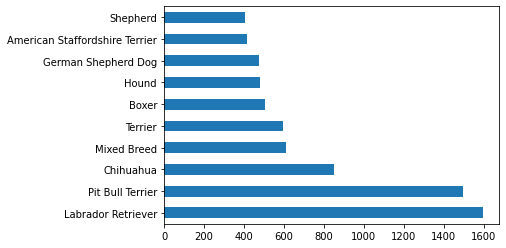

In [8]:
breed_desc["breed_primary"].value_counts().head(10).plot(kind='barh')

<AxesSubplot:>

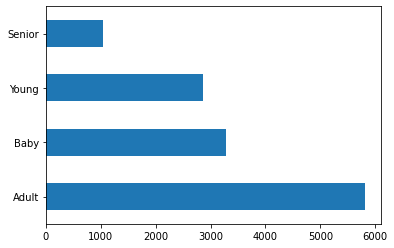

In [9]:
breed_desc["age"].value_counts().plot(kind='barh')

<AxesSubplot:>

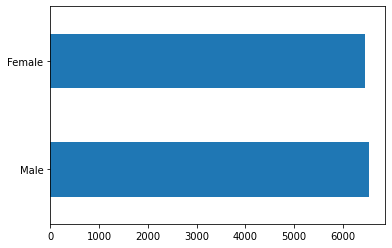

In [10]:
breed_desc["sex"].value_counts().plot(kind='barh')

<AxesSubplot:>

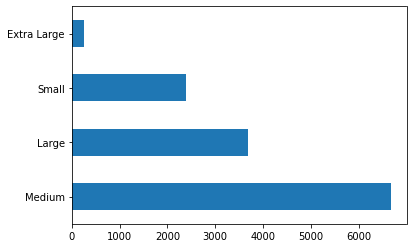

In [11]:
breed_desc["size"].value_counts().plot(kind='barh')

From just a few lines of code, it looks like our dogs are medium, adult aged, male, and labrador retrievers. This gives us good quantitative data of what the dogs looks like, but the heart and soul of a rescue dog's personality lives in the description.

## Q1: What does a typical description of a dog look like?

In [12]:
def clean_desc(text):
    text = text.lower()  # lowercase text
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)  # Remove punctuation
    text = " ".join(text.split())  # Remove extra spaces, tabs, and new lines
    return text

## Q2: Can we generate our own dog descriptions?
### (or, Markov chains and text wrangling for computer-generated descriptions)

We can use a technique called [Markov chains](https://setosa.io/ev/markov-chains/) and the library [markovify](https://pypi.org/project/markovify/) to use natural language processing techniques for generating fake dog descriptions.

In [13]:
breed_desc["clean_text"] = breed_desc["description"].map(clean_desc) # perform clean_desc function on every row
breed_desc["clean_text"]

4        theo is a friendly dachshund mix who gets alon...
5        oliver was born around midjune and came to us ...
6        macadamia was born around july 8th and donât...
7        dodger is a handsome smart heeler mix who was ...
8        huckleberry is a friendly girl who was born ma...
                               ...                        
58164    dwayne is your typical adolescent happy playfu...
58165    sebastian is your typical herding dog high ene...
58166    charlie was adopted from us 5 years ago but re...
58167    samson is a dog that will need someone to show...
58172    buddy was an owner surrender by an older gentl...
Name: clean_text, Length: 12992, dtype: object

In [14]:
# set seed for reproducibility
np.random.seed(500)

# take 4 words at a time to train markov chain
text_model = markovify.Text(breed_desc["clean_text"], state_size=4)

# generate three sentences of 280 character length from trained model
for i in range(3):
    print(text_model.make_short_sentence(280) + "\n")

cocoa krispie sweet this handsome brown white boy is super sweet with everyone he meets he would make a wonderful family fur baby

this is samsammy heâll be 9 years old perfect companion for a stroll in the neighborhood of one of our volunteers will contact you via email

an application must be approved for adoption our goal is to find the best forever home is our 1 priority



The beautiful thing about data science is that you really have 3 possible outcomes with your EDA.

1. You learn your data is bad, and you can't do what you thought you were going to do.
2. You learn about your data, but it's really just reiterating the things you already know.
3. You learn new and unexpected things about your data.

And they don't happen equally. At first glance, our small markov model sees something unexpected-- the descriptions might be used more often as a contact card than a dog's profile for personality traits. 

Why might it seem this way? Well, we don't know for sure. This might just be the most OFTEN used. #to do, add more

## Q3: What kind of dog is there the longest?

## Q4: What states have the most adoptable dogs?

In [62]:
import plotly.express as px

# find number of occurances for each state
states = breed_desc.contact_state.value_counts().to_frame()
states['state'] = states.index
print(states.index)

Not all of these are valid US states. Some are from Canada, and some are zip codes. After doing some digging, I was able to locate where all of the zip codes are from, and decided to remove the Canadian provinces.

In [63]:
# rows that we do not want as part of our map
excess_rows = ['98106', '45249', '37189', '12220', '61944', 'QC', 'NB']

# add together the rows that include the zip code of the state, then drop the rows
states.loc['OH', 'contact_state'] = states.loc['45249', 'contact_state'] + states.loc['OH', 'contact_state']
states.loc['TN', 'contact_state'] = states.loc['37189', 'contact_state'] + states.loc['TN', 'contact_state']
states.loc['NY', 'contact_state'] = states.loc['12220', 'contact_state'] + states.loc['NY', 'contact_state']
states.loc['IL', 'contact_state'] = states.loc['61944', 'contact_state'] + states.loc['IL', 'contact_state']
states.loc['WA', 'contact_state'] = states.loc['98106', 'contact_state'] + states.loc['WA', 'contact_state']
states['adoptable_dogs'] = states['contact_state']
states = states.drop(excess_rows)

In [64]:
px.choropleth(states, locations='state', locationmode="USA-states", color='adoptable_dogs',
                           scope="usa"
                          )

Every state, besides Montana and Hawaii has adoptable dogs! New York and Pennsylvania seem to have the most adoptable dogs with over 1000 each, whereas Alaska only has 5. It might be important to check for data integrity at the API level, because it seems unlikely that states have NO dogs for adoption.